## Import libraries & read-in the csv file.

In [1]:
# Import required librariies.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset

df = pd.read_csv("census_14_2022.csv")
df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Guildfast Lane,June,Cooper,52,Head,Divorced,Female,Unemployed,None,Christian
1,1,1,Guildfast Lane,Rita,Cooper,10,Daughter,NaN,Female,Student,None,NaN
2,2,2,Guildfast Lane,Melanie,Atkinson,52,Head,Married,Female,"Producer, television/film/video",None,Catholic
3,3,2,Guildfast Lane,Stuart,Atkinson,53,Husband,Married,Male,Aid worker,None,Christian
4,4,3,Guildfast Lane,Donna,Finch,44,Head,Married,Female,Translator,None,None


In [3]:
# Delete duplicate column

df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
# Show the top 5 rows

df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Guildfast Lane,June,Cooper,52,Head,Divorced,Female,Unemployed,None,Christian
1,1,Guildfast Lane,Rita,Cooper,10,Daughter,NaN,Female,Student,None,NaN
2,2,Guildfast Lane,Melanie,Atkinson,52,Head,Married,Female,"Producer, television/film/video",None,Catholic
3,2,Guildfast Lane,Stuart,Atkinson,53,Husband,Married,Male,Aid worker,None,Christian
4,3,Guildfast Lane,Donna,Finch,44,Head,Married,Female,Translator,None,None


In [5]:
# Renaming the columns for ease of manipulation.

df.rename(columns = {'House Number':"house_number", 
          'Street': "street",
          'First Name': "first_name", 
          'Surname': "surname", 
          'Age': "age",
          'Relationship to Head of House': "relationship_to_head_of_house", 
          'Marital Status': "marital_status", 
          'Gender': "gender",
          'Occupation': "occupation", 
          'Infirmity' : "infirmity", 
          'Religion':"religion"}, inplace = True)

In [6]:
# Gives summary information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   house_number                   10594 non-null  object
 1   street                         10594 non-null  object
 2   first_name                     10594 non-null  object
 3   surname                        10594 non-null  object
 4   age                            10594 non-null  object
 5   relationship_to_head_of_house  10594 non-null  object
 6   marital_status                 7849 non-null   object
 7   gender                         10594 non-null  object
 8   occupation                     10594 non-null  object
 9   infirmity                      10594 non-null  object
 10  religion                       7803 non-null   object
dtypes: object(11)
memory usage: 910.5+ KB


## Quick observations

1. Marital_status and religion has null values
2. House_number and age should be integers and not object Dtypes.

In [7]:
# Gives information about missing values.

df.isnull().sum()

house_number                        0
street                              0
first_name                          0
surname                             0
age                                 0
relationship_to_head_of_house       0
marital_status                   2745
gender                              0
occupation                          0
infirmity                           0
religion                         2791
dtype: int64

<AxesSubplot: >

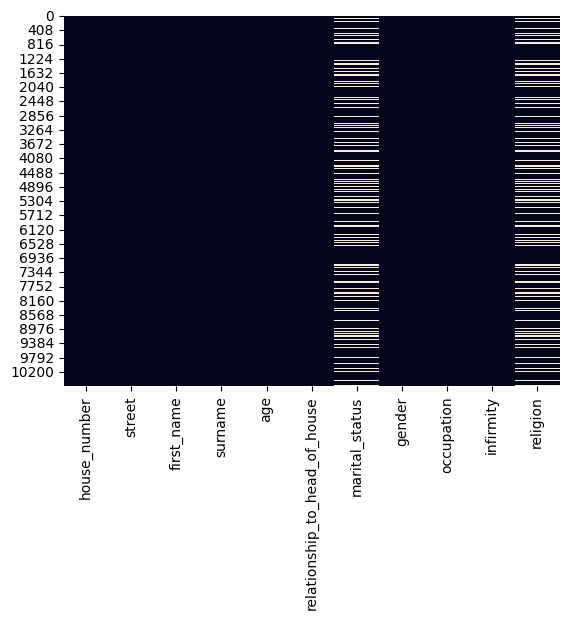

In [8]:
# A heatmap to vissualise the null values.

sns.heatmap(df.isnull(),cbar=False)

In [9]:
# # !pip install pandas-profiling

# import pandas_profiling
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df, title ='EDA of Census Data')
# profile.to_file('censuseda.html')

In [10]:
# # importing sweetviz
# import sweetviz as sv

# #analyzing the dataset
# census_report = sv.analyze(df)

# #display the report
# census_report.show_html('census_report.html')

# Data Cleaning

### Age

In [11]:
# Shows the unique values in the age column

df["age"].unique()

array(['52', '10', '53', '44', '46', '13', '12', '19', '30', '39', '38',
       '11', '7', '48', '16', '76', '50', '79', '64', '31', '67', '60',
       '62', '26', '20', '18', '22', '23', '21', '33', '37', '0', '83',
       '5', '1', '35', '59', '34', '27', '41', '55', '57', '17', '54',
       '75', '80', '43', '6', '3', '42', '32', '49', '51', '9', '56',
       '65', '36', '40', '8', '28', '25', '4', '63', '77', '58', '47',
       '84', '2', '45', '61', '81', '84.77995285', '89.77995285', '15',
       '85', '69', '24', '48.79471576', '49.79471576', '14', '66', '29',
       '103', '72', '98', '68', '78', '82', '105', '108', '70', '88',
       '71', '87', '86', '73', '102', '104', '74', '90', '72.58356639',
       '76.23509181', '91', '94', '100', '106', '99', '63.49234533', '89',
       '115', ' ', '101', '95', '92', '96', '93', '60.47982178',
       '57.47982178', '97', '47.63674446', '46.63674446'], dtype=object)

In [12]:
# Check for cells with empty space as entries.

df[df["age"]== " "]

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
5976,27,Wall Bypass,Hilary,Clark,,Daughter,Single,Female,University Student,None,None


In [13]:
df['age'].replace(" ", "0.001", inplace = True) # Replace the emppty " ", with 0.001.

df['age'] = df['age'].astype('float') # Convert the data from string to float datatype

df['age'] = df['age'].astype('int64') # Convert the data from float to int64 datatype

print(df['age'].median())

34.0


In [14]:
df['age'].replace(0.001, 34, inplace = True) # Replace the 0.001, with 34 (Median age).


In [15]:
# Checking for possible outliers

print(df[df["age"]> 122])

print(df[df["age"]< 0])

Empty DataFrame
Columns: [house_number, street, first_name, surname, age, relationship_to_head_of_house, marital_status, gender, occupation, infirmity, religion]
Index: []
Empty DataFrame
Columns: [house_number, street, first_name, surname, age, relationship_to_head_of_house, marital_status, gender, occupation, infirmity, religion]
Index: []


In [16]:
# Check that all the changes were made. 

df["age"].unique()

array([ 52,  10,  53,  44,  46,  13,  12,  19,  30,  39,  38,  11,   7,
        48,  16,  76,  50,  79,  64,  31,  67,  60,  62,  26,  20,  18,
        22,  23,  21,  33,  37,   0,  83,   5,   1,  35,  59,  34,  27,
        41,  55,  57,  17,  54,  75,  80,  43,   6,   3,  42,  32,  49,
        51,   9,  56,  65,  36,  40,   8,  28,  25,   4,  63,  77,  58,
        47,  84,   2,  45,  61,  81,  89,  15,  85,  69,  24,  14,  66,
        29, 103,  72,  98,  68,  78,  82, 105, 108,  70,  88,  71,  87,
        86,  73, 102, 104,  74,  90,  91,  94, 100, 106,  99, 115, 101,
        95,  92,  96,  93,  97], dtype=int64)

### Religion

In [17]:
# Check for unique entries for Religion.

df['religion'].unique()

array(['Christian', nan, 'Catholic', 'None', 'Methodist', 'Sikh',
       'Muslim', 'Quaker', 'Jewish', 'Sith', 'Bahai', 'Jedi', 'Buddist',
       'Undecided', 'Nope'], dtype=object)

In [18]:
# Checking the number of adherents.

df["religion"].value_counts()

None         3463
Christian    2317
Catholic     1180
Methodist     611
Muslim        136
Sikh           55
Jewish         32
Bahai           2
Undecided       2
Quaker          1
Sith            1
Jedi            1
Buddist         1
Nope            1
Name: religion, dtype: int64

In [19]:
# Replace all religion with 2 or less adherents with the mode - "None"

df["religion"] = df["religion"].replace( 'Bahai' ,'None')
df["religion"] = df["religion"].replace( 'Undecided', 'None')
df["religion"] = df["religion"].replace( 'Quaker' ,'None')
df["religion"] = df["religion"].replace( 'Sith' ,'None')
df["religion"] = df["religion"].replace( 'Jedi' ,'None')
df["religion"] = df["religion"].replace( 'Buddist' ,'None')
df["religion"] = df["religion"].replace( 'Nope', 'None')

df['religion'].unique()

array(['Christian', nan, 'Catholic', 'None', 'Methodist', 'Sikh',
       'Muslim', 'Jewish'], dtype=object)

In [20]:
# Check unique entries for minors

df[df["age"] <= 15 ]["religion"].unique()

array([nan, 'None'], dtype=object)

In [21]:
# Show the respondents below 16 years with religion as "None".

df[(df["age"] <= 15) & (df["religion"] == "None")]

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
5976,27,Wall Bypass,Hilary,Clark,0,Daughter,Single,Female,University Student,None,None


In [22]:
# Change all the null values to the mode of the religion - "None".

df["religion"].replace(np.nan, "None", inplace = True)

df['religion'].unique()

array(['Christian', 'None', 'Catholic', 'Methodist', 'Sikh', 'Muslim',
       'Jewish'], dtype=object)

## Note 1.

I decided to change all null values in religion to the mode "None" as the respondents in this category are primarily minors.

### House Number 

In [23]:
# Find the unique entries for House Number column.

df["house_number"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [24]:
# Check for cells with empty space as entries.

df[df["house_number"] == " "]

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion


In [25]:
df["house_number"] = df["house_number"].replace('Nine', '9') # 'Nine' was changed to numeric format

df['house_number'] = df['house_number'].astype('float') # Convert the data from string to float datatype

df['house_number'] = df['house_number'].astype('int64') # Convert the data from float to int64 datatype

# Check that the corrections were made.

df["house_number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

### Street 

In [26]:
# finding the unique entries for Street column.

df["street"].unique()

array(['Guildfast Lane', 'Hall Lane', 'Mistry Avenue',
       'Thompson Villages', 'Violet Street', 'Lisbon Heights',
       'Long Canyon', 'Waterloo Fort', 'Thedike Lane', 'Foster Run',
       'Libra Ports', 'North Avenue', 'Bassenthwaite Lane',
       'Foster Street', 'Jackson Street', 'Magpie Lane',
       'Birminghamedge Road', 'Glasgow Street', 'Harrison Heights',
       'Arrows Street', 'Stoke Drive', 'Andrews Rue', 'Williams Light',
       'Williams Lodge', 'Aethelstan Road', 'Armstrong Common',
       'Rice Plaza', 'Repton Spur', 'Portsmouthtraps Street',
       'Lovecross Lane', 'Manor Plain', 'Templeshy Street', 'Alba Union',
       'Robinson Drive', 'Potter Spurs', 'Fish Mews', 'Column Manor',
       'Taylor Street', 'Plymouth Via', 'Sydney Skyway', 'Preston Way',
       'Anvil Street', 'Chapman Avenue', 'Wessex Drive', 'March Bridge',
       'Farthing Avenue', 'Bassenthwaitecurl Avenue', 'Telegraph Circle',
       'Windsor Crescent', 'Wall Bypass', 'Yucca Lane', 'Brooks Dri

In [27]:
# # Check for cells with empty space as entries.

df[df["street"]== ' ']

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion


### First Name

In [28]:
# finding the unique entries for First Name column.

df["first_name"].unique()

array(['June', 'Rita', 'Melanie', 'Stuart', 'Donna', 'Marcus', 'Jennifer',
       'Megan', 'Angela', 'Sharon', 'Hugh', 'Connor', 'Stacey', 'Derek',
       'Carolyn', 'Dawn', 'Maria', 'Sam', 'Michelle', 'Melissa',
       'Cameron', 'Pamela', 'James', 'Gerard', 'Samantha', 'Emma',
       'Jayne', 'Marie', 'Timothy', 'Harriet', 'Lawrence', 'Gail',
       'Valerie', 'Jonathan', 'Norman', 'Colin', 'Robert', 'Chelsea',
       'Bethan', 'George', 'Alison', 'Mohammad', 'Alexandra', 'Kimberley',
       'Darren', 'Tina', 'Sheila', 'Dale', 'Jay', 'Abbie', 'Francis',
       'Rebecca', 'Christine', 'Stephen', 'Lynne', 'Samuel', 'Kathleen',
       'Anthony', 'Philip', 'Steven', 'Jeffrey', 'Vincent', 'Rachael',
       'Gordon', 'Kate', 'Louise', 'Lisa', 'Leah', 'Mitchell', 'Beverley',
       'Geraldine', 'Joe', 'William', 'Wendy', 'Lindsey', 'Frederick',
       'Paul', 'Gillian', 'Sara', 'Ben', 'Shannon', 'Fiona', 'Joanne',
       'Lee', 'Amelia', 'Rosemary', 'Holly', 'Keith', 'Joan', 'Lewis',
      

In [29]:
# Check for cells with empty space as entries.

df[df["first_name"]== ' ']

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
2759,4,Armstrong Common,,Green,65,Head,Widowed,Male,"Editor, magazine features",None,Catholic


In [30]:
# Replce the empty space with Unknown for consistency

df["first_name"] = df["first_name"].replace(' ', 'Unknown')

# Check that the correction was made

df[df["first_name"]== ' ']

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion


### Surname

In [31]:
# finding the unique entries for Surname column.

df["surname"].unique()

array(['Cooper', 'Atkinson', 'Finch', 'Humphries', 'Tyler', 'Davies',
       'Murphy', 'Jones', 'Johnson', 'Webster', 'Clarke', 'Andrews',
       'Whitehead', 'Long', 'Dean', 'Leach', 'Young', 'Scott', 'Edwards',
       'Woods', 'Bennett', 'Taylor', 'Iqbal', 'Hall', 'Short',
       'Scott-Hughes', 'John', 'Harris-Young', 'Murray', 'Cooke', 'Potts',
       'Miller', 'Brown', 'Wood', 'Abbott-Berry', 'Reid', 'Miles',
       'Field', 'Singh', 'Jenkins', 'Grant-Taylor', 'Pope', 'Griffin',
       'Ross', 'Price', 'Bird', "O'Donnell", 'Thomas', "O'Connor",
       'Clark', 'Wilkins', 'Mills', 'Howard', 'Chapman', 'Harding',
       'Perry-Harding', 'Parker', 'Ahmed', 'Morris', 'King', 'Farmer',
       'Burke', 'Williams', 'Schofield', 'Elliott', 'Turner',
       'Turner-Gallagher', 'Smith', 'Fitzgerald', 'Butler', 'Ali',
       'Patel', 'Russell', 'Armstrong', 'Daly', 'Sutton',
       'Wright-Thomson', 'Watson', 'Ball', 'Burrows', 'Connor',
       'Richards', 'Stevenson', 'Hammond', 'Matthews',

In [32]:
# Check for cells with empty space as entries.

df[df["surname"] ==' ']

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion


### Relationship to Head of House

In [33]:
# finding the unique entries for Relationship to Head of House column.

df["relationship_to_head_of_house"].unique()

array(['Head', 'Daughter', 'Husband', 'Partner', 'Son', 'None', 'Lodger',
       'Wife', 'Granddaughter', 'Grandson', 'Sibling', 'Visitor',
       'Step-Daughter', 'Adopted Daughter', 'Cousin', 'Step-Son', 'Neice',
       'Nephew', 'Adopted Son', 'Adopted Grandson',
       'Adopted Granddaughter', ' '], dtype=object)

In [34]:
# Check if there are any empty cell

df[df["relationship_to_head_of_house"] == ' ']

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
10131,13,Simmons Tunnel,Andrew,Clark,38,,Married,Male,"Surveyor, minerals",None,Christian
10392,3,Metcalfe Port,Lydia,Mitchell,52,,Single,Female,"Scientist, product/process development",None,Christian


In [35]:
df[(df["street"] == 'Simmons Tunnel') & (df["house_number"] == 13)]

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
10130,13,Simmons Tunnel,Eileen,Clark,40,Head,Married,Female,Publishing rights manager,None,Christian
10131,13,Simmons Tunnel,Andrew,Clark,38,,Married,Male,"Surveyor, minerals",None,Christian
10132,13,Simmons Tunnel,Cheryl,Clark,8,Daughter,NaN,Female,Student,None,None


In [36]:
df[(df["street"] == 'Metcalfe Port') & (df["house_number"] == 3)]

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
10391,3,Metcalfe Port,Gavin,Morris,50,Head,Single,Male,Medical sales representative,None,Christian
10392,3,Metcalfe Port,Lydia,Mitchell,52,,Single,Female,"Scientist, product/process development",None,Christian
10393,3,Metcalfe Port,Sandra,Morris,23,Daughter,Single,Female,Financial trader,None,Christian
10394,3,Metcalfe Port,Clifford,Morris,22,Son,Single,Male,University Student,None,Christian
10395,3,Metcalfe Port,Angela,Morris,5,Daughter,NaN,Female,Student,None,None


In [37]:
# Replace " ", with Husband and Lodgerin the respective rows.

df["relationship_to_head_of_house"][10131] = df["relationship_to_head_of_house"][10131].replace(' ', 'Husband')

df["relationship_to_head_of_house"][10392] = df["relationship_to_head_of_house"][10392].replace(' ', 'Lodger')

C:\Users\685364\AppData\Local\Temp\ipykernel_9372\3671181507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relationship_to_head_of_house"][10131] = df["relationship_to_head_of_house"][10131].replace(' ', 'Husband')
C:\Users\685364\AppData\Local\Temp\ipykernel_9372\3671181507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["relationship_to_head_of_house"][10392] = df["relationship_to_head_of_house"][10392].replace(' ', 'Lodger')


In [38]:
# Check if there is any Head of family under 18 years old.

df[df["relationship_to_head_of_house"]=='Head'][df['age'] < 18]

C:\Users\685364\AppData\Local\Temp\ipykernel_9372\3128141524.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["relationship_to_head_of_house"]=='Head'][df['age'] < 18]


,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion


In [39]:
# Check that corrections have been made.

df["relationship_to_head_of_house"].unique()

array(['Head', 'Daughter', 'Husband', 'Partner', 'Son', 'None', 'Lodger',
       'Wife', 'Granddaughter', 'Grandson', 'Sibling', 'Visitor',
       'Step-Daughter', 'Adopted Daughter', 'Cousin', 'Step-Son', 'Neice',
       'Nephew', 'Adopted Son', 'Adopted Grandson',
       'Adopted Granddaughter'], dtype=object)

## Note 2.

1. I imputed Andrew Clark with Husband in the relationship_to_head_of_house entry as he lives in the same house with Eileen Clark the head of the house with whom he has same surname with and are both married.

2. I imputed Lydia Mitchell with Lodger in the relationship_to_head_of_house entry as he lives in the same house with Gavin	Morris the head of the house who is also single, however have children. They are perhaps a divorced couple.

### Marital Status

In [40]:
#finding the unique entries for Marital Status column.

df["marital_status"].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', 'M', 'D', 'S',
       'W'], dtype=object)

In [41]:
# Fix all the inconsistencies

df["marital_status"].replace('M', 'Married', inplace = True) # Replace 'M' with Married
df["marital_status"].replace('S', 'Single', inplace = True) # Replace 'S' with Single
df["marital_status"].replace('D', 'Divorced', inplace = True) # Replace 'D' with Divorced
df["marital_status"].replace('W', 'Widowed', inplace = True) # Replace 'W' with Widowed

df["marital_status"].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed'], dtype=object)

<AxesSubplot: xlabel='age', ylabel='marital_status'>

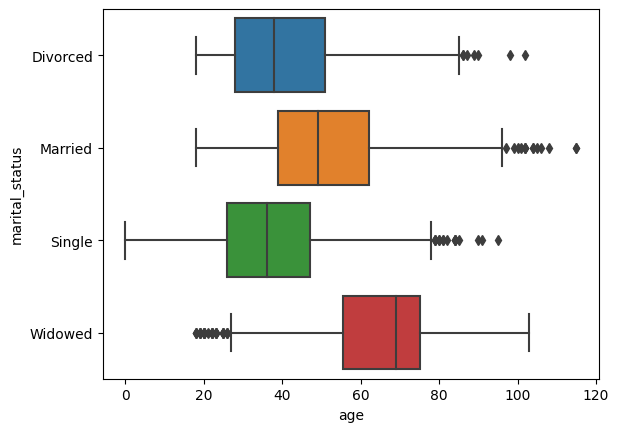

In [42]:
# Showing the marital status against age by boxplot.

sns.boxplot(  y=df["marital_status"], x=df["age"] )

In [43]:
# Shows unique entries for Minors Marital Status

df[df["age"] < 16 ]["marital_status"].unique()

array([nan, 'Single'], dtype=object)

In [44]:
# Find the Minor that's shown as single, this should be replaced with "NA"

df[(df["age"] < 16 ) & (df["marital_status"] == "Single")]

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
5976,27,Wall Bypass,Hilary,Clark,0,Daughter,Single,Female,University Student,None,None


In [45]:
# Replace all null values with "NA" since they are responses predominant for ages less 16.

df["marital_status"].replace(np.nan, "NA", inplace=True)

In [46]:
df["marital_status"].value_counts()

Single      3753
Married     2766
NA          2745
Divorced     922
Widowed      408
Name: marital_status, dtype: int64

In [47]:
df["marital_status"].unique()

array(['Divorced', 'NA', 'Married', 'Single', 'Widowed'], dtype=object)

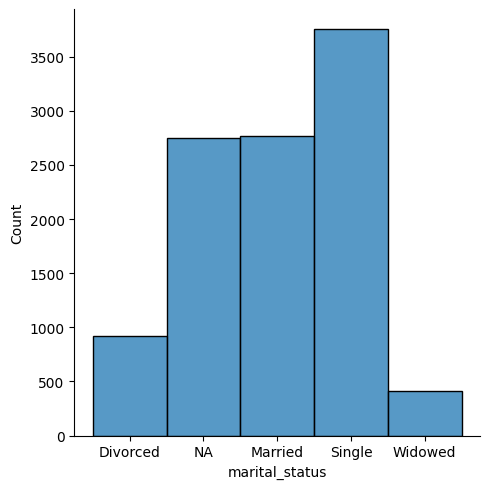

In [48]:
sns.displot(data=df, x='marital_status')

### Gender

In [49]:
# Show the unique entries for Gender.

df['gender'].unique()

array(['Female', 'Male', 'M', 'F', 'female', 'male', 'f', 'm'],
      dtype=object)

In [50]:
df['gender'].value_counts()

Female    5426
Male      4809
F           76
M           69
male        69
female      54
m           48
f           43
Name: gender, dtype: int64

In [51]:
# Fix the inconsistent formats

df["gender"] = df["gender"].replace('F', 'Female')
df["gender"] = df["gender"].replace('female', 'Female')
df["gender"] = df["gender"].replace('f', 'Female')
df["gender"] = df["gender"].replace('M', 'Male')
df["gender"] = df["gender"].replace('male', 'Male')
df["gender"] = df["gender"].replace('m', 'Male')

# Check that all corrections have been made.

df['gender'].unique()

array(['Female', 'Male'], dtype=object)

### Occupation

In [52]:
# Show the unique entries for Occupation.

df['occupation'].unique()

array(['Unemployed', 'Student', 'Producer, television/film/video', ...,
       'Retired Newspaper journalist', 'Retired Ambulance person',
       'Retired Exercise physiologist'], dtype=object)

In [53]:
# checking if any person over 65 is unemployed.

df[df["occupation"] == 'Unemployed'] [df["age"] > 64]

C:\Users\685364\AppData\Local\Temp\ipykernel_9372\3219703252.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["occupation"] == 'Unemployed'] [df["age"] > 64]


,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
127,23,Mistry Avenue,Ashleigh,Williams,65,Head,Married,Female,Unemployed,None,Catholic
165,38,Mistry Avenue,Louise,Hall,77,Head,Divorced,Female,Unemployed,None,Christian
274,16,Thompson Villages,Natalie,Stokes,67,Head,Widowed,Female,Unemployed,None,Christian
334,33,Thompson Villages,Terence,Cameron,103,Head,Widowed,Male,Unemployed,None,Methodist
488,11,Long Canyon,Nicole,Lloyd,69,Wife,Married,Female,Unemployed,None,Catholic
503,4,Waterloo Fort,Eric,Bartlett,72,Head,Widowed,Male,Unemployed,None,Catholic
522,3,Thedike Lane,Janet,Yates,65,Head,Married,Female,Unemployed,None,Christian
823,22,Bassenthwaite Lane,Michelle,Thornton,65,Head,Widowed,Female,Unemployed,None,Christian
877,5,Foster Street,Allan,Clark,67,Head,Married,Male,Unemployed,None,None
891,10,Foster Street,Rachel,Jordan,78,Head,Divorced,Female,Unemployed,None,None


In [54]:
df[df["age"] > 64 ] = df[df["age"] > 64 ].replace( "Unemployed", "Retired, Unemployed")

In [55]:
# Checking if any person under the 18 years old has job.

df[df["age"] < 18] ["occupation"].unique()


array(['Student', 'Child', 'University Student'], dtype=object)

### Infirmity

In [56]:
# Show unique entries for Infirmity.

df['infirmity'].unique()

array(['None', 'Mental Disability', 'Deaf', ' ', 'Unknown Infection',
       'Disabled', 'Physical Disability', 'Blind'], dtype=object)

In [57]:
# Replace the empty cell with None for consistency

df["infirmity"] = df["infirmity"].replace(' ', 'Unknown Infection')

# Check that the corrections where made.

df['infirmity'].unique()

array(['None', 'Mental Disability', 'Deaf', 'Unknown Infection',
       'Disabled', 'Physical Disability', 'Blind'], dtype=object)

In [58]:
# creating a cleaned output

df.to_csv('cleaned_census_14_2022.csv', index=False)

# Exploratory Data Analysis and Vissualisation

In [59]:
# Read in the cleaned data
df = pd.read_csv('cleaned_census_14_2022.csv')

df.head()

,house_number,street,first_name,surname,age,relationship_to_head_of_house,marital_status,gender,occupation,infirmity,religion
0,1,Guildfast Lane,June,Cooper,52,Head,Divorced,Female,Unemployed,None,Christian
1,1,Guildfast Lane,Rita,Cooper,10,Daughter,NaN,Female,Student,None,None
2,2,Guildfast Lane,Melanie,Atkinson,52,Head,Married,Female,"Producer, television/film/video",None,Catholic
3,2,Guildfast Lane,Stuart,Atkinson,53,Husband,Married,Male,Aid worker,None,Christian
4,3,Guildfast Lane,Donna,Finch,44,Head,Married,Female,Translator,None,None


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10594 entries, 0 to 10593
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   house_number                   10594 non-null  int64 
 1   street                         10594 non-null  object
 2   first_name                     10594 non-null  object
 3   surname                        10594 non-null  object
 4   age                            10594 non-null  int64 
 5   relationship_to_head_of_house  10594 non-null  object
 6   marital_status                 7849 non-null   object
 7   gender                         10594 non-null  object
 8   occupation                     10594 non-null  object
 9   infirmity                      10594 non-null  object
 10  religion                       10594 non-null  object
dtypes: int64(2), object(9)
memory usage: 910.5+ KB


### Population Demographics

Text(0.5, 1.0, 'Histogram of age')

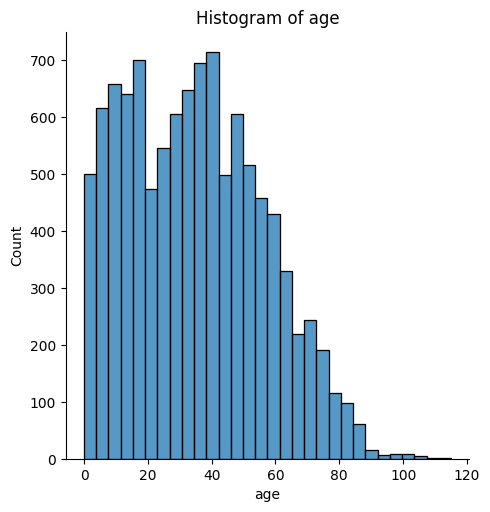

In [61]:
sns.displot(data=df, x='age', bins = 30)
plt.title('Histogram of age')

# plt.savefig('agehistogram.png',dpi=400)

In [62]:
# Create dataframe for male.

df_male = df[df["gender"] == "Male"]
df_female = df[df["gender"] == "Female"]


print(df_male.info())
print(df_female.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 3 to 10592
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   house_number                   4995 non-null   int64 
 1   street                         4995 non-null   object
 2   first_name                     4995 non-null   object
 3   surname                        4995 non-null   object
 4   age                            4995 non-null   int64 
 5   relationship_to_head_of_house  4995 non-null   object
 6   marital_status                 3632 non-null   object
 7   gender                         4995 non-null   object
 8   occupation                     4995 non-null   object
 9   infirmity                      4995 non-null   object
 10  religion                       4995 non-null   object
dtypes: int64(2), object(9)
memory usage: 468.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5599 entries, 0 to

Text(0.5, 1.0, 'Male age distribution')

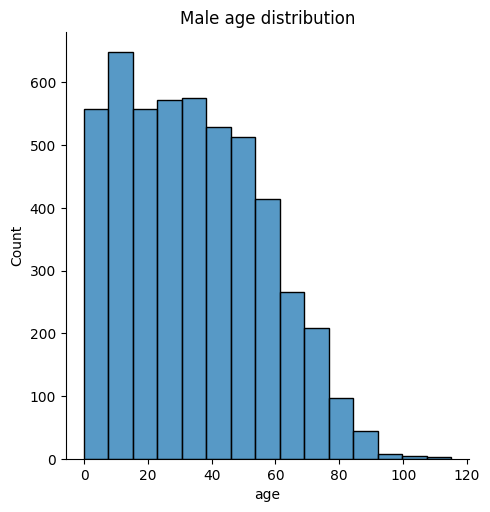

In [63]:
sns.displot(data=df_male, x='age', bins = 15)
plt.title('Male age distribution')

Text(0.5, 1.0, 'Female age distribution')

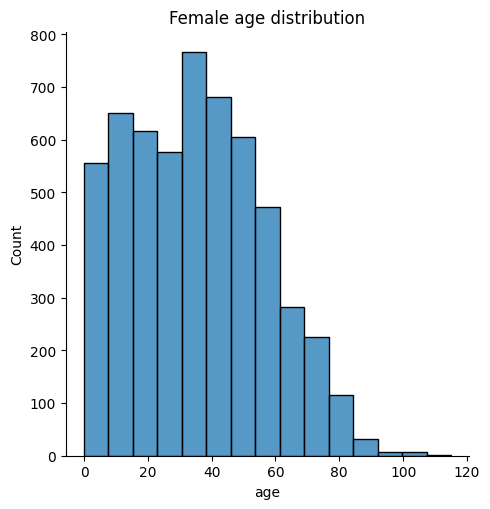

In [64]:
sns.displot(data=df_female, x='age', bins = 15)

plt.title('Female age distribution')

In [65]:
# Defining age bar for male and female.

# Male
male = df_male["age"]

male_5=0
male_10=0
male_15=0
male_20=0
male_25=0
male_30=0
male_35=0
male_40=0
male_45=0
male_50=0
male_55=0
male_60=0
male_65=0
male_70=0
male_75=0
male_80=0
male_85=0
male_90=0
male_95=0
male_100=0

#  Counting the number of male in each age group using for loop.

for i in male:
    if i <5:
        male_5+=1
    elif i <10:
        male_10+=1
    elif i <15:
        male_15+=1
    elif i <20:
        male_20+=1
    elif i <25:
        male_25+=1        
    elif i <30:
        male_30+=1
    elif i <35:
        male_35+=1        
    elif i <40:
        male_40+=1        
    elif i <45:
        male_45+=1        
    elif i <50:
        male_50+=1  
    elif i <55:
        male_55+=1        
    elif i <60:
        male_60+=1
    elif i <65:
        male_65+=1        
    elif i <70:
        male_70+=1        
    elif i <75:
        male_75+=1        
    elif i <80:
        male_80+=1  
    elif i <85:
        male_85+=1        
    elif i <90:
        male_90+=1        
    elif i <95:
        male_95+=1 
    else:
        male_100+=1

# Female

female = df_female["age"]

female_5=0
female_10=0
female_15=0
female_20=0
female_25=0
female_30=0
female_35=0
female_40=0
female_45=0
female_50=0
female_55=0
female_60=0
female_65=0
female_70=0
female_75=0
female_80=0
female_85=0
female_90=0
female_95=0
female_100=0

#  Counting the number of female in each age group using for loop.

for i in female:
    if i <5:
        female_5+=1
    elif i <10:
        female_10+=1
    elif i <15:
        female_15+=1
    elif i <20:
        female_20+=1
    elif i <25:
        female_25+=1        
    elif i <30:
        female_30+=1
    elif i <35:
        female_35+=1        
    elif i <40:
        female_40+=1        
    elif i <45:
        female_45+=1        
    elif i <50:
        female_50+=1  
    elif i <55:
        female_55+=1        
    elif i <60:
        female_60+=1
    elif i <65:
        female_65+=1        
    elif i <70:
        female_70+=1        
    elif i <75:
        female_75+=1        
    elif i <80:
        female_80+=1  
    elif i <85:
        female_85+=1        
    elif i <90:
        female_90+=1        
    elif i <95:
        female_95+=1 
    else:
        female_100+=1



In [66]:
# Creating two list that contains age bar group for male and female.

male_list=[male_5,
           male_10,
           male_15,
           male_20,
           male_25,
           male_30,
           male_35,
           male_40,
           male_45,
           male_50,
           male_55,
           male_60,
           male_65,
           male_70,
           male_75,
           male_80,
           male_85,
           male_90,
           male_95,
           male_100]


female_list=[female_5,
             female_10,
             female_15,
             female_20,
             female_25,
             female_30,
             female_35,
             female_40,
             female_45,
             female_50,
             female_55,
             female_60,
             female_65,
             female_70,
             female_75,
             female_80,
             female_85,
             female_90,
             female_95,
             female_100]

In [67]:
# Creating a dataframe with age bars for male and female.

age_df=pd.DataFrame({'age': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+'],
              'male': [-male_5,-male_10,-male_15,-male_20,-male_25,-male_30,-male_35,-male_40,-male_45,-male_50,-male_55,-male_60,-male_65,-male_70,-male_75,-male_80,-male_85,-male_90,-male_95,-male_100],
              'female': [female_5,female_10,female_15,female_20,female_25,female_30,female_35,female_40,female_45,female_50,female_55,female_60,female_65,female_70,female_75,female_80,female_85,female_90,female_95,female_100]})
age_df

,age,male,female
0,0-4,-319,327
1,5-9,-413,403
2,10-14,-394,387
3,15-19,-403,466
4,20-24,-365,378
5,25-29,-362,360
6,30-34,-349,456
7,35-39,-380,493
8,40-44,-382,484
9,45-49,-346,424


[Text(0.5, 23.52222222222222, 'Population Count'),
 Text(24.472222222222214, 0.5, 'Age Group')]

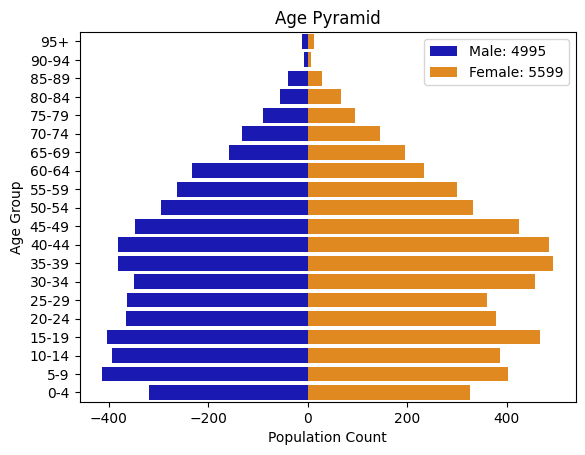

In [68]:
# Creating the age pyramid

AgeClass = ['95+','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

age_pyramid = sns.barplot(x='male', 
                       y='age', 
                       data=age_df, 
                       order=AgeClass,
                       lw=0,color=('mediumblue'), 
                       label='Male: 4995')

age_pyramid = sns.barplot(x='female', 
                       y='age', 
                       data=age_df, 
                       order=AgeClass, 
                       lw=0,color=('darkorange'), 
                       label='Female: 5599')

age_pyramid.legend()

plt.title('Age Pyramid') 
plt.savefig('age_pyramid.png', dpi=300)

age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

### Commuters & Employment

In [69]:
# Shows count of all entries as occupation

df['occupation'].value_counts()

Student                          2239
Child                             645
University Student                642
Unemployed                        605
Retired, Unemployed                51
                                 ... 
Retired Web designer                1
Retired Commissioning editor        1
Retired Editor, film/video          1
Retired Producer, radio             1
Retired Exercise physiologist       1
Name: occupation, Length: 1077, dtype: int64

In [70]:
# Defining occupation status by categorising the employment status.

# creating a temp empty list to store the occupation categoiries.
temp = []

# Using the for loop to separate the occupation status of each group.

for i in df['occupation']:
    if i == 'University Student':
        temp.append('University Student')
    elif i == 'PhD Student':
        temp.append('PhD Student')
    elif i == 'Journalist, newspaper':
        temp.append('Journalist, newspaper')
    elif i =='Naval architect':
        temp.append('Naval architect')
    elif i =='Hydrogeologist':
        temp.append('Hydrogeologist') 
    elif i =='Broadcast journalist':
        temp.append('Broadcast journalist') 
    elif i =='Building services engineer':
        temp.append('Building services engineer') 
    elif i =='Tax inspector':
        temp.append('Tax inspector') 
    elif i =='Social worker':
        temp.append('Social worker') 
    elif i =='Intelligence analyst':
        temp.append('Intelligence analyst') 
    elif i =='Games developer':
        temp.append('Games developer') 
    elif i =='Database administrator':
        temp.append('Database administrator')
    elif i =='IT sales professional':
        temp.append('IT sales professional')
    elif i =='Patent attorney':
        temp.append('Patent attorney') 
    elif i =='Sales promotion account executive':
        temp.append('Sales promotion account executive') 
    elif i =='Chartered loss adjuster':
        temp.append('Chartered loss adjuster') 
    elif i =='Operations geologist':
        temp.append('Operations geologist') 
    elif i =='Data scientist':
        temp.append('Data scientist')
    elif i =='Technical sales engineer':
        temp.append('Technical sales engineer')
    elif i =='Engineer, electrical':
        temp.append('Engineer, electrical')
    elif i =='Quarry manager':
        temp.append('Quarry manager')
    elif i =='Textile designer':
        temp.append('Textile designer')
    elif i =='Theatre stage manager':
        temp.append('Theatre stage manager')
    elif i =='Animator':
        temp.append('Animator')
    elif i =='Librarian, public':
        temp.append('Librarian, public')     
    elif i =='Research officer, government':
        temp.append('Research officer, government')      
    elif i =='Horticultural therapist':
        temp.append('Horticultural therapist')
    elif i =='Soil scientist':
        temp.append('Soil scientist')
    elif i =='Animal technologist':
        temp.append('Animal technologist')
    elif i =='Medical secretary':
        temp.append('Medical secretary')
    elif i =='Special effects artist':
        temp.append('Special effects artist')
    elif i =='Probation officer':
        temp.append('Probation officer')
    elif i =='Academic librarian':
        temp.append('Academic librarian')     
    elif i =='Furniture designer':
        temp.append('Furniture designer')
    elif i =='Quantity surveyor':
        temp.append('Quantity surveyor')
    elif i =='Surgeon':
        temp.append('Surgeon')
    elif i =='Wellsite geologist':
        temp.append('Wellsite geologist')
    elif i =='Charity fundraiser':
        temp.append('Charity fundraiser')
    elif i =='Research scientist (physical sciences)':
        temp.append('Research scientist (physical sciences)')
    elif i =='Outdoor activities/education manager':
        temp.append('Outdoor activities/education manager')
    elif i =='Geographical information systems officer':
        temp.append('Geographical information systems officer')
    elif i =='Engineer, control and instrumentation':
        temp.append('Engineer, control and instrumentation')
    elif i =='Diagnostic radiographer':
        temp.append('Diagnostic radiographer')
    elif i =='Health promotion specialist':
        temp.append('Health promotion specialist')
    elif i =='Hydrogeologist':
        temp.append('Hydrogeologist')
    elif i =='Pharmacologist':
        temp.append('Pharmacologist')
    elif i =='Engineer, chemical':
        temp.append('Engineer, chemical')
    elif i =='Patent attorney':
        temp.append('Patent attorney')
    elif i =='Building services engineer':
        temp.append('Building services engineer')
                    

    else:
        temp.append('non_commuters')

df['commute_status'] = temp


# Shows the count of each group in occupational status.
df['commute_status'].value_counts()


non_commuters                               9283
University Student                           642
PhD Student                                   23
Animator                                      18
Librarian, public                             17
Journalist, newspaper                         17
Naval architect                               17
Engineer, electrical                          16
Technical sales engineer                      16
Data scientist                                16
Horticultural therapist                       16
Research officer, government                  16
Chartered loss adjuster                       15
Textile designer                              15
Operations geologist                          15
Wellsite geologist                            15
Charity fundraiser                            15
Probation officer                             15
Animal technologist                           15
Special effects artist                        15
Surgeon             

In [71]:
# Count the commuters and non-commuters using for loop

non_commuters = []
commuters = []

for i in temp:
    if i == "non_commuters":
        non_commuters.append(i)
    else:
        commuters.append("commuters")
print(len(commuters))
print(len(non_commuters))

1311
9283


In [72]:
# Create an empty list to store the employment status.

occ = []

# Using the for loop to separate the occupation status of each group.

for i in df['occupation']:
    
    if i == 'University Student':
        occ.append('University Student')
    elif i == 'Student':
        occ.append('Student')
    elif i == 'Child':
        occ.append('Child')
    elif 'Retired' in i:
        occ.append('Retired')
    elif 'PhD' in i:
        occ.append('University Student')
    elif i =='Unemployed':
        occ.append('Unemployed')        
    else:
        occ.append('employed')

df['occupation_status'] = occ

#showing the distribution of each group in occupational status.
df['occupation_status'].value_counts()

employed              5606
Student               2239
Retired                834
University Student     665
Child                  645
Unemployed             605
Name: occupation_status, dtype: int64

In [73]:
# Calculating commuters rate 

print(len(commuters)/len(df)* 100000)

print(len(commuters)/5606* 100)



12374.929205210497
23.385658223332147


### Birth Rate, death Rate and growth rate

In [74]:
# Calculating the newborns in three age categories.

newborn_0 = len(df[df['age']== 0 ])
newborn_5 = len(df[df['age']== 5 ])
newborn_10 = len(df[df['age']== 10 ])

print(f" Number of newborns this years is: {newborn_0} ")
print(f" Number of newborns in 5 years ago is: {newborn_5} ")
print(f" Number of newborns in 10 years ago is: {newborn_10}")

 Number of newborns this years is: 119 
 Number of newborns in 5 years ago is: 156 
 Number of newborns in 10 years ago is: 163


In [75]:
# Calculating crude birth rate -  CBR

CBR = newborn_0 / len(df)*100000
CBR_5 = newborn_5 / len(df)*100000
CBR_10 = newborn_10 / len(df)*100000


print(f" The CBR is : {CBR} ")
print(f" The CBR 5 years ago is : {CBR_5} ")
print(f" The CBR 10 years ago is : {CBR_10} ")

# CBR has decreased steadily in the past 10 years

 The CBR is : 1123.2773267887483 
 The CBR 5 years ago is : 1472.5316216726449 
 The CBR 10 years ago is : 1538.6067585425712 


In [76]:
# Calculating The Age-Specific Fertility Rate (ASFR)

women_age_25_29 = (df['age'].between(25,29)) & (df['gender'] == 'Female')
women_age_30_34 = (df['age'].between(30,34)) & (df['gender'] == 'Female')
women_age_35_39 = (df['age'].between(35,39)) & (df['gender'] == 'Female')

women_age_25_29 = len(df[women_age_25_29])
women_age_30_34 = len(df[women_age_30_34])
women_age_35_39 = len(df[women_age_35_39])

birth_rate_per_1000_25_29 = newborn_0/women_age_25_29 * 100000
birth_rate_per_1000_30_34 = newborn_5/women_age_30_34 * 100000
birth_rate_per_1000_35_39 = newborn_10/women_age_35_39 * 100000


print(f" ASFR for 25 to 29 is : {birth_rate_per_1000_25_29} ")
print(f" ASFR for 30 to 34 is : {birth_rate_per_1000_30_34} ")
print(f" ASFR for 35 to 39 is : {birth_rate_per_1000_35_39} ")

 ASFR for 25 to 29 is : 33055.555555555555 
 ASFR for 30 to 34 is : 34210.52631578947 
 ASFR for 35 to 39 is : 33062.88032454361 


In [77]:
# Finding the aged population.

age_65_99 = df[df['age'].between(65,115)]
aging_people = age_65_99['age'].value_counts().sort_index(ascending=False)
aging_people

115     2
108     1
106     1
105     1
104     2
103     2
102     4
101     1
100     1
99      2
98      1
97      1
96      4
95      2
94      2
93      1
92      2
91      1
90      7
89      7
88     18
87     13
86     17
85     13
84     23
83     28
82     17
81     30
80     25
79     28
78     29
77     33
76     51
75     45
74     47
73     47
72     77
71     44
70     63
69     59
68     65
67     74
66     80
65     75
Name: age, dtype: int64

In [78]:
# Calculating the difference between current year and one year ago.

five_year_diff = aging_people.shift(-5)

# Calculating the death number

diff = aging_people - five_year_diff
deaths=0
for i in diff:
    if i <0:
        deaths+=-i
print(f" The number of deaths over the past five years is: {deaths}")


 The number of deaths over the past five years is: 363.0


In [79]:
# Calculating the death rate and growth rate

death_rate = round(deaths/len(df)/5*100000, 2)
print(f" The death rate is: {death_rate}")


 The death rate is: 685.29


### Migration

In [80]:
# Calculating the immigration number using to visitors and lodgers.

immigrants = ((df['relationship_to_head_of_house'] == 'Visitor' ) | (df['relationship_to_head_of_house' ] == 'Lodger' )) & (df['marital_status']== 'Single')
immigrants = len(df[immigrants])

# Calculating the number of people emigrating

divorced_men = (df['marital_status'] == 'Divorced') & (df['gender'] == 'Male')
divorced_men = len(df[divorced_men])

divorced_women =  (df['marital_status'] == 'Divorced') & (df['gender'] == 'Female')
divorced_women = len(df[divorced_women])

emigrants = divorced_women-divorced_men

# Calculating the immigration and emigration rate 
immigration_rate = round(immigrants/len(df) * 100000, 2)
emigration_rate = round(emigrants/len(df) * 100000, 2)


# Calculating the net migration

net_migration = immigrants - emigrants
net_migration_rate = round((immigrants - emigrants)/len(df)*100000 , 2)

print(f" The  immigration rate is: {immigration_rate}")
print(f" The emigration rate is: {emigration_rate}")
print(f" The net migration rate is: {net_migration_rate}")

 The  immigration rate is: 3615.25
 The emigration rate is: 1925.62
 The net migration rate is: 1689.64


### Occupancy Level

In [81]:
# shows the level of occupancy in each house

occupancy = df.groupby(['house_number','street']).size().reset_index(name='Occupancy_Count')
occupancy

,house_number,street,Occupancy_Count
0,1,Aethelstan Road,2
1,1,Alba Union,4
2,1,Andrews Rue,2
3,1,Anvil Street,1
4,1,Armstrong Common,2
...,...,...,...
3455,197,March Bridge,11
3456,198,March Bridge,9
3457,199,March Bridge,12
3458,200,March Bridge,8


In [82]:
# occupancy describe

occupancy.describe()

,house_number,Occupancy_Count
count,3460.000000,3460.000000
mean,45.196821,3.061850
std,46.706798,1.939439
min,1.000000,1.000000
25%,10.000000,2.000000
50%,27.000000,3.000000
75%,65.000000,4.000000
max,201.000000,22.000000


In [83]:
# Showing houses with high occupancy rate

occupancy[occupancy['Occupancy_Count'] >10 ]

,house_number,street,Occupancy_Count
22,1,Forgotten Fortress,12
49,1,Manor Plain,14
53,1,Miller Abbey,20
61,1,O'Sullivan Commune,12
99,1,Willow Manor,11
340,4,Portsmouthtraps Street,12
371,4,Windsor Crescent,11
417,5,Manor Plain,15
508,6,Metcalfe Port,15
752,9,Metcalfe Port,14


In [84]:
# Showing houses with high occupancy rate

above_median_occupancy = occupancy[occupancy['Occupancy_Count'] >3 ]
high_occupancy = occupancy[occupancy['Occupancy_Count'] >10 ]

# Calculating the number of household
houshold = df[(df['relationship_to_head_of_house' ] == 'Head')]

above_median_occupancy_rate = len(above_median_occupancy)/len(houshold)*100
high_occupancy_rate = len(high_occupancy)/len(houshold)*100

print(len(high_occupancy))
print(above_median_occupancy_rate)
print(high_occupancy_rate)

38
37.77456647398844
1.0982658959537572


### Religion

None         59.118369
Christian    21.870870
Catholic     11.138380
Methodist     5.767416
Muslim        1.283746
Sikh          0.519162
Jewish        0.302058
Name: religion, dtype: float64

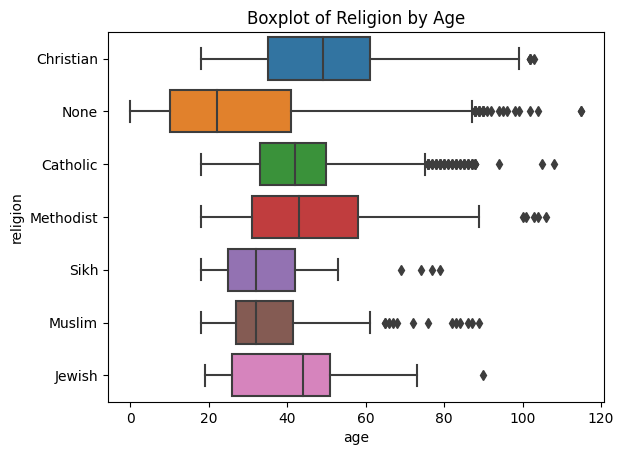

In [85]:
fig, ax = plt.subplots()
sns.boxplot( x=df["age"], y=df["religion"],ax=ax )
plt.title("Boxplot of Religion by Age")
plt.savefig('religion_fig.png')
df["religion"].value_counts()/df["religion"].count() * 100